## Python Web visualization shootout

In the recent past, several attempts have been made to bring Python visualizations to the web. In this post, I review some of these along with minimal code for illustration. I shall also discuss a few pros of each library. In order to maintain the look and feel of this post, I shall be embedding these dynamic plots using IFrame.

In [1]:
%matplotlib inline

#### Customary imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Generating some random data

In [3]:
df = pd.DataFrame(np.random.randn(50,2))

In [5]:
df.head()

,0,1
0,0.872656,0.705066
1,-1.646088,1.122487
2,-0.198849,-0.755976
3,0.813494,1.205144
4,-0.850235,-1.776423


This dataframe has 2 columns and 50 rows.

Let us do the plain old Matplotlib plotting

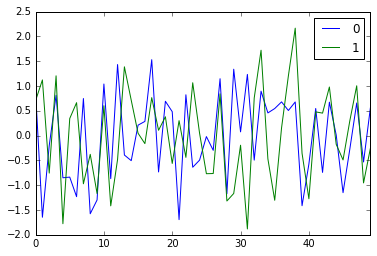

In [6]:
df.plot();

Doesn't look that pretty! Let us import seaborn for prettier plots

In [7]:
import seaborn as sns

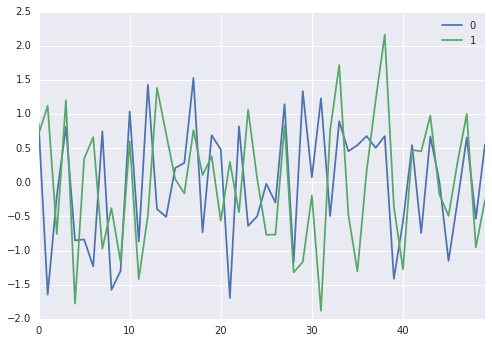

In [8]:
df.plot();

### mpld3

* Scrapes the matplotlib plot for relevant plotting options and data. Thus, one need not learn new syntax
* Can be embedded easily in a webpage
* Good integration with IPython notebook
* Active community
* Easy to extend via plugins

In [10]:
from mpld3 import enable_notebook, disable_notebook

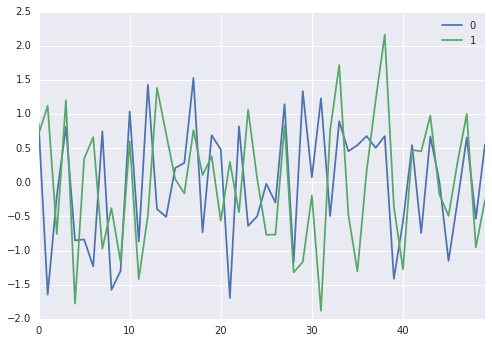

In [11]:
enable_notebook()
ax = df.plot();


In [12]:
disable_notebook()

At the lower left corner you can use dynamic controls- pan, box-zoom, scroll-zoom and home

### Bearcart

* Very minimal
* Built for Pandas dataframes
* Unlike mpld3, plot directly from data, i.e., no need for matplotlib
* Can toggle on-off series with ease

In [13]:
import bearcart

ImportError: No module named bearcart

In [28]:
ch = bearcart.Chart(data=df, x_time=False)
html_path = '/home/nipun/Dropbox/Public/blog/dynamic/bearcart.html'
data_path = r'/home/nipun/Dropbox/Public/blog/dynamic/data.json'
js_path = r'/home/nipun/Dropbox/Public/blog/dynamic/rickshaw.min.js'
css_path = r'/home/nipun/Dropbox/Public/blog/dynamic/rickshaw.min.css'
ch.create_chart(html_path=html_path, data_path=data_path)


In [31]:
IFrame('http://dl.dropboxusercontent.com/u/75845627/blog/dynamic/bearcart.html',1200,485)

You may use the scroll at the bottom to select different subsets. You may also toggle series on-off from the legend.
NB: I had to do a bit of manipulation to get this to work. Possibly Bearcart like mpld3 should allow CDN.

### Bokeh

* Ships with powerful server- capable of doing things like smart sampling for showing large quantity of data
* Plans to handle Dataframes in near future
* Developing into a very mature Grammar of Graphics inspired library
* Integrates well with Matplotlib, Seaborn
* Rapid improvements in each version

In [15]:
from bokeh.plotting import *

output_file('/home/nipun/Dropbox/Public/blog/dynamic/bokeh_html.html')
line(df.index.values, df[0].values, color="red", legend="0")
hold()
line(df.index.values, df[1].values, color="blue", legend="1")
show()

Session output file '/home/nipun/Dropbox/Public/blog/dynamic/bokeh_html.html' already exists, will be overwritten.


In [16]:
IFrame('https://dl.dropboxusercontent.com/u/75845627/blog/dynamic/bokeh_html.html',800,750)

### Plotly

* Allows data and plots to be shared
* Really good UI
* UI allows annotation, basic stats like curve fitting etc.
* No botheration about hosting

In [14]:
import plotly
p = plotly.plotly('IPython.Demo', '1fw3zw2o13')
p.verbose = False

ImportError: No module named plotly

In [18]:
def df_to_iplot(df):    
    '''
    Coverting a Pandas Data Frame to Plotly interface
    '''
    x = df.index.values
    lines={}
    for key in df:
        lines[key]={}
        lines[key]["x"]=x
        lines[key]["y"]=df[key].values
        lines[key]["name"]=key

        #Appending all lines
    lines_plotly=[lines[key] for key in df]
    return lines_plotly

In [19]:
p.iplot(df_to_iplot(df))

Each library has its own use cases and make the Python web visualization ecosystem stronger!

Feel free to comment or edit this post. It is also available on nbviewer [here](http://nbviewer.ipython.org/github/nipunbatra/nipunbatra.github.io/tree/master/content/downloads/notebooks/dynamic.ipynb).